<a href="https://colab.research.google.com/github/marcosdiezw/Unimed_BH_Bootcamp_Exercises/blob/main/Argentinian_wines/Wholesale_Argentinian_wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***

# <center> <font color=purple size=7 > $VINHOS$ $ARGENTINOS$ </font>
<center>

<font color=purple size=5 > ***Análise de venda atacadista no ano 2022*** </font>

***

<center>
<img src="https://github.com/marcosdiezw/Unimed_BH_Bootcamp_Exercises/blob/main/Argentinian_wines/wines_image.jpg?raw=true" align="middle" width= "50000">
</center>


# **Introdução**
> O seguinte documento é uma descrição e análise exploratória da **venda atacadista** de produtos viníferos argentinos. O estudo tem como objetivo detalhar as características dos volumes e preços de venda destes produtos, destacando as regiões geográficas, tempos, variedades e outras nuances estratégicas do mercado, fornecendo assim informações úteis para futuros investidores.

In [ ]:
# Importando biblioteca Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', None)

# **Carga dos dados**

Os arquivos foram fornecidos pelo Instituto Nacional de Vitivinicultura da Argentina. <br>
As extrações foram feitas em arquivos de até 60 dias cada um.

In [ ]:
# Leitura dos arquivos
df_jan_fev = pd.read_csv("https://raw.githubusercontent.com/marcosdiezw/Unimed_BH_Bootcamp_Exercises/main/Argentinian_wines/vinhos_argentinos_01_02.csv", sep=';', encoding='latin-1')
df_mar_abr = pd.read_csv("https://raw.githubusercontent.com/marcosdiezw/Unimed_BH_Bootcamp_Exercises/main/Argentinian_wines/vinhos_argentinos_03_04.csv", sep=';', encoding='latin-1')
df_mai_jun = pd.read_csv("https://raw.githubusercontent.com/marcosdiezw/Unimed_BH_Bootcamp_Exercises/main/Argentinian_wines/vinhos_argentinos_05_06.csv", sep=';', encoding='latin-1')
df_jul_ago = pd.read_csv("https://raw.githubusercontent.com/marcosdiezw/Unimed_BH_Bootcamp_Exercises/main/Argentinian_wines/vinhos_argentinos_07_08.csv", sep=';', encoding='latin-1')
df_ago_set = pd.read_csv("https://raw.githubusercontent.com/marcosdiezw/Unimed_BH_Bootcamp_Exercises/main/Argentinian_wines/vinhos_argentinos_08_09.csv", sep=';', encoding='latin-1')

# Juntando em um só dataframe
df = pd.concat([df_jan_fev, df_mar_abr, df_mai_jun, df_jul_ago, df_ago_set])
df1 = df.copy()

# **Descrição da base e tratamento das variáveis**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 0 to 830
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vendedor Provincia     10494 non-null  object 
 1   Vendedor Departamento  10494 non-null  object 
 2   Producto               10494 non-null  object 
 3   Variedad               10499 non-null  object 
 4   Volumen (litros)       10494 non-null  float64
 5   Fecha                  10494 non-null  object 
 6   Precio                 10494 non-null  object 
 7   Forma de Pago          10494 non-null  object 
dtypes: float64(1), object(7)
memory usage: 738.2+ KB


## **Dicionário de dados (base original)**

| **Nome da Variável** | **Descrição**         | **Tipo de dado**
|:--------------------|:---------------------|:-----------|
|Vendedor Provincia    |Estado do vendedor | str|
|Vendedor Departamento         |Município do vendedor | str|
|Producto   |Descrição do produto| str| 
|Variedad  |Variedade de uvas utilizadas| str|
|Volumen (litros)  |Volume do produto em litros| float64|
|Fecha   |Data|str|
|Precio   |Preço em AR$| str|
|Forma de pago |Mêtodo de pagamento (*contado*: **à vista**, *diferido*: **crédito**)| str|         

In [ ]:
# Mudando os nomes das colunas para o português
df1 = df.rename(columns={
    'Vendedor Provincia' : 'Estado_vendedor',
    'Vendedor Departamento': 'Municipio_vendedor',
    'Producto':'Produto',
    'Variedad':'Variedade',
    'Volumen (litros)':'Volume',
    'Fecha':'Data',
    'Precio':'Preco',
    'Forma de Pago': 'Forma_pagamento'
})

## **Formatação de variáveis numéricas**

In [ ]:
# Formatando para nomenclatura inglesa de separador de decimais,
# para os dados numéricos serem reconhecidos como tals.
df1.to_csv('wines_file', index=False)
df1 = pd.read_csv("wines_file", sep=',', encoding='latin-1', decimal=',', thousands='.')

## **Formatação de variáveis de tipo texto (strings)**

In [ ]:
# Formatando os atributos das variáveis categóricas
df1.Estado_vendedor = df1.Estado_vendedor.str.title()
df1.Municipio_vendedor = df1.Municipio_vendedor.str.title()
df1.Produto = df1.Produto.str.title()
df1.Variedade = df1.Variedade.str.title()
df1.Forma_pagamento = df1.Forma_pagamento.str.lower()

df1.Estado_vendedor = df1.Estado_vendedor.str.strip()
df1.Municipio_vendedor = df1.Municipio_vendedor.str.strip()
df1.Produto = df1.Produto.str.strip()
df1.Variedade = df1.Variedade.str.strip()
df1.Forma_pagamento = df1.Forma_pagamento.str.strip()

# Limpando os atributos, tirando símbolos desnecessários, 
# espaços em branco e palavras redundantes da variável Variedade

df1.Variedade = df1.Variedade.str.replace('--','')
df1.Variedade = df1.Variedade.str.replace(' -',' ')
df1.Variedade = df1.Variedade.str.replace('-',' ')
df1.Variedade = df1.Variedade.str.replace('.- ','')
df1.Variedade = df1.Variedade.str.replace('(shiraz-sirah)','')
df1.Variedade = df1.Variedade.str.replace('(Shiraz Sirah)','')
df1.Variedade = df1.Variedade.str.replace('\(\)','')
df1.Variedade = df1.Variedade.str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
# Criando funções para tirar palavras repetidas e separar o nome
# das variedades principais por um lado,
# e a presença de otras variantes em outro.

def clean_varieties (string):
  if ((string == string) == True) or type(string) == str:
    varieties = []
    if 'Otras Varied Tintas P/Vinif.' in string:
      string = string.replace('Otras Varied Tintas P/Vinif','')
      varieties.append('tintas')
    if 'Otras Var.Blancas P/Vinificar' in string:
      string = string.replace('Otras Var.Blancas P/Vinificar','')
      varieties.append('brancas')
    if 'Otras Var. Rosadas P/Vinificar' in string:
      string = string.replace('Otras Var. Rosadas P/Vinificar','')
      varieties.append('rose')
    if len(varieties) == 0:
      varieties.append('sem_misturas')
    lista = string.split()
    words = set(lista)
    words = list(words)
    words.sort()
    new_string = ' '.join(words)
    new_string = new_string.replace('.','')
    new_string = new_string.strip()
    Varieties = '-'.join(varieties)
    return [new_string, Varieties]

def identify_purity(string):
  if string == 'sem_misturas':
    return True
  else:
    return False

# Gerando uma copia e aplicando a função para criar as duas colunas com
# esses atributos.
df2 = df1.copy()
df2['Variedades'] = df1['Variedade'].apply(lambda s: clean_varieties(s)[0])
df2['Outras_variedades'] = df1['Variedade'].apply(lambda s: clean_varieties(s)[1])
df2['Pureza_total'] = df2['Outras_variedades'].apply(lambda s: identify_purity(s))
df2['Variedade'] = df2['Variedades']
df2 = df2.drop(columns=['Variedades'])

## **Formatação de variáveis de tempo (datetime)**

In [ ]:
df3 = df2.copy()
df3['Data'] = pd.to_datetime(df2.Data, utc=True, yearfirst=True)

df3['Dia'] = df3['Data'].dt.day.astype('object')
df3['Dia'] = df3['Data'].dt.day.astype(int, errors= 'ignore')
df3['Mes'] = df3['Data'].dt.day.astype('object')
df3['Mes'] = df3['Data'].dt.month.astype(int, errors= 'ignore')
df3['Data'] = df3['Data'].dt.date



In [ ]:
df3.loc[df2.Produto.str.contains('Vino')==True, ['Variedade']].value_counts()[:20]

Variedade         
                      4683
Malbec                1915
Cabernet Sauvignon     543
Chardonnay             231
Bonarda                216
Riojano Torrontes      211
Syrah                  167
Cabernet Franc         163
Merlot                 137
Negro Pinot             92
Sauvignon               80
Tempranillo             69
Verdot                  60
Gimenez Pedro           51
Chenin                  47
Ancellotta              29
Tannat                  27
Bonarda Malbec          16
Semillon                13
Aspirant Bouschet       13
dtype: int64

In [ ]:
df3.head()

,Estado_vendedor,Municipio_vendedor,Produto,Variedade,Volume,Data,Preco,Forma_pagamento,Outras_variedades,Pureza_total,Dia,Mes
0,Mendoza,Lujan De Cuyo,Vino Varietal Tinto,Cabernet Sauvignon,100000.0,2022-02-28,75.0,diferido,sem_misturas,True,28.0,2.0
1,Mendoza,Lujan De Cuyo,Vino Varietal Tinto,Cabernet Sauvignon,50000.0,2022-02-28,75.0,diferido,tintas,False,28.0,2.0
2,Mendoza,Lujan De Cuyo,Vino Varietal Tinto,Malbec,250000.0,2022-02-28,75.0,diferido,sem_misturas,True,28.0,2.0
3,Mendoza,Lujan De Cuyo,Vino Varietal Tinto,Cabernet Franc,88000.0,2022-02-28,75.0,diferido,sem_misturas,True,28.0,2.0
4,Mendoza,Guaymallen,Vino Tinto,,49500.0,2022-02-28,20.0,contado,sem_misturas,True,28.0,2.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estado_vendedor     10494 non-null  object 
 1   Municipio_vendedor  10494 non-null  object 
 2   Produto             10494 non-null  object 
 3   Variedade           10499 non-null  object 
 4   Volume              10494 non-null  float64
 5   Data                10494 non-null  object 
 6   Preco               10494 non-null  float64
 7   Forma_pagamento     10494 non-null  object 
 8   Outras_variedades   10499 non-null  object 
 9   Pureza_total        10499 non-null  bool   
 10  Dia                 10494 non-null  float64
 11  Mes                 10494 non-null  float64
dtypes: bool(1), float64(4), object(7)
memory usage: 912.6+ KB


## **Criação de novas colunas e dataframes auxiliares**

In [ ]:
# Criando um DataFrame com uma coluna com as médias de preços por produto e variedade
medias_produtos = df3.groupby(['Produto','Variedade']
                              ).agg({'Preco':np.mean}
                              ).reset_index()

medias_produtos = medias_produtos.rename(columns = {'Preco':'Media_preco'})
medias_produtos

#Atualizando o nosso DataFrame principal com a nova coluna
df4 = pd.merge(df3, medias_produtos, how= 'left', on=['Produto','Variedade'])

# Criando a coluna da receita dos vendedores por lote vendido
df4['Receita'] = df4.Volume.mul(df4.Preco)

In [ ]:
# Criando um DataFrame para os produtos com suas respetivas receitas
Produtos_receitas = df4.groupby(
    'Produto'
    ).agg({'Receita':np.sum}
    ).sort_values(by='Receita', ascending=False
    ).reset_index()

Top5_produtos = Produtos_receitas.nlargest(5, 'Receita')

# Criando o DataFrame que classifica os 5 produtos com maior receita
# e agrupa os produtos restantes

menor = min(list(Top5_produtos.values[:,1]))
menor

Outros_receita = Produtos_receitas[Produtos_receitas.Receita < menor]
Outros_receita_total = Outros_receita['Receita'].sum()
Outros_receita_total

Outros_produtos = pd.DataFrame([['Outros', Outros_receita_total]], columns=['Produto', 'Receita'])
Outros_produtos

Top5_e_outros = pd.concat([Top5_produtos, Outros_produtos]).reset_index()

# Criando um DataFrame para os 5 estados com maior receita
Top5_Estados_vendedores = df4.groupby(
    'Estado_vendedor'
    ).agg({'Receita':np.sum}
    ).sort_values(by='Receita', ascending=False
    ).nlargest(5, 'Receita'
    ).reset_index()

# Criando um DataFrame para os 5 municípios com maior receita
Top5_municipios = df4.groupby(
    ['Estado_vendedor', 'Municipio_vendedor']
    ).agg({'Receita':np.sum}
    ).sort_values(by='Receita', ascending=False
    ).nlargest(5, 'Receita'
    ).reset_index()

# Criando um DataFrame apenas para vinhos varietais
Vinhos_varietais = df4[df4.Produto.str.contains('Vino Varietal')== True]

# Criando um DataFrame apenas para vinhos varietais tintos
Vinhos_varietais_tintos = df4[
    (df4.Produto == 'Vino Varietal Tinto')|
    (df4.Produto == 'Vino Varietal A Certificar Tinto')]

# Criando um DataFrame apenas para vinhos varietais brancos
Vinhos_varietais_brancos = df4[
    (df4.Produto == 'Vino Varietal Blanco')|
    (df4.Produto == 'Vino Varietal A Certificar Blanco')]

# Criando um DataFrame apenas para vinhos varietais rosé
Vinhos_varietais_rose = df4[
    (df4.Produto == 'Vino Varietal Rosado')|
    (df4.Produto == 'Vino Varietal A Certificar Rosado')]

# Criando um DataFrame com os 5 variedades de vinhos que geraram maior receita
Top5_varietais = Vinhos_varietais.groupby(
    ['Produto','Variedade']
    ).agg({'Receita':np.sum}
    ).sort_values(by='Receita', ascending=False
    ).nlargest(5, 'Receita'
    ).reset_index()

# Criando um DataFrame com as 5 variedades de vinhos tintos que geraram a maior receita
Top5_varietais_tintos = Vinhos_varietais_tintos.groupby(
    'Variedade'
    ).agg({'Receita':np.sum}
    ).sort_values(by='Receita', ascending=False
    ).nlargest(5, 'Receita'
    ).reset_index()

# Criando um DataFrame com as 5 variedades de vinhos brancos que geraram a maior receita
Top5_varietais_brancos = Vinhos_varietais_brancos.groupby(
    'Variedade'
    ).agg({'Receita':np.sum}
    ).sort_values(by='Receita', ascending=False
    ).nlargest(5, 'Receita'
    ).reset_index()

# Criando um DataFrame com as 5 variedades de vinhos rosé que geraram a maior receita
Top5_varietais_rose = Vinhos_varietais_rose.groupby(
    'Variedade'
    ).agg({'Receita':np.sum}
    ).sort_values(by='Receita', ascending=False
    ).nlargest(5, 'Receita'
    ).reset_index()

# Criando o DataFrame dos vinhos varietais puros e o dos que possuem
# mistura de outras variedades para vinhificar.

Vinhos_impuros = df4[(df4.Pureza_total == False)&(df4.Produto.str.contains('Vino'))]
Vinhos_puros = df4[(df4.Pureza_total == True)&(df4.Produto.str.contains('Vino'))]

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 0 to 10498
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estado_vendedor     10494 non-null  object 
 1   Municipio_vendedor  10494 non-null  object 
 2   Produto             10494 non-null  object 
 3   Variedade           10499 non-null  object 
 4   Volume              10494 non-null  float64
 5   Data                10494 non-null  object 
 6   Preco               10494 non-null  float64
 7   Forma_pagamento     10494 non-null  object 
 8   Outras_variedades   10499 non-null  object 
 9   Pureza_total        10499 non-null  bool   
 10  Dia                 10494 non-null  float64
 11  Mes                 10494 non-null  float64
 12  Media_preco         10494 non-null  float64
 13  Receita             10494 non-null  float64
dtypes: bool(1), float64(6), object(7)
memory usage: 1.1+ MB


## **Dicionário de dados atualizado (base tratada)**

| **Nome da Variável** | **Descrição**         | **Tipo de dado**
|:--------------------|:---------------------|:-----------|
|Estado_vendedor    |Estado do vendedor | str|
|Municipio_vendedor  |Município do vendedor | str|
|Produto   |Descrição do produto| str| 
|Variedade  |Variedade de uvas utilizadas| str|
|Volume |Volume do produto em litros| float64|
|Data  |Data|str|
|Preco   |Preço em AR$| float64|
|Forma_pagamento |Mêtodo de pagamento (*contado*: **à vista**, *diferido*: **crédito**)| str|      
|Outras_variedades |Presença de variedades de uva adicionais| str| 
|Pureza_total |Posse de variedades além das declaradas| bool|
|Dia |Dia da operação|float64|  
|Mes |Mês numérico|float64|  
|Media_preco |Média do preço por produto e variedade| float64|  
|Receita |Receita da operação| float64|  

# **Perguntas estratégicas**

## **1) Análises temporais e de localização**

### **1.1. Quais os 5 estados com maior receita?**

In [ ]:
Top5_Estados_vendedores

,Estado_vendedor,Receita
0,Mendoza,4.162512e+11
1,San Juan,8.237025e+10
2,La Rioja,4.768348e+09
3,Catamarca,3.984969e+09
4,Salta,3.472500e+09


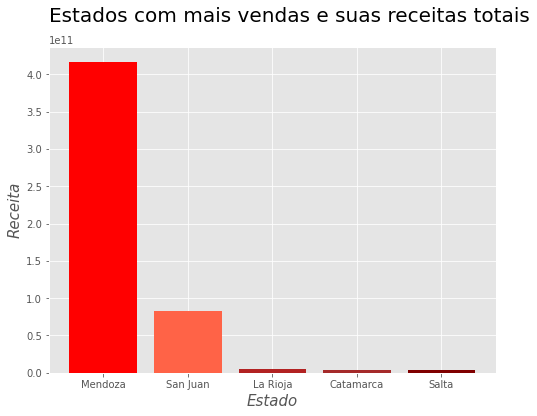

In [ ]:
plt.figure( figsize=(8,6))
plt.bar(Top5_Estados_vendedores.Estado_vendedor,
        Top5_Estados_vendedores.Receita,
        color=['red','tomato','firebrick','brown','maroon']);
plt.title('Estados com mais vendas e suas receitas totais', size=20, loc='left', pad=25)
plt.xlabel('Estado', style='italic', size=15)
plt.ylabel('Receita', style='italic', size=15)
plt.style.use('ggplot');

### **1.2. Quais os 5 municípios com maior receita?**

In [ ]:
Top5_municipios

,Estado_vendedor,Municipio_vendedor,Receita
0,Mendoza,San Martin,1.295784e+11
1,Mendoza,Maipu,6.902218e+10
2,Mendoza,Rivadavia,4.123369e+10
3,Mendoza,Lujan De Cuyo,3.275765e+10
4,Mendoza,Lavalle,3.207565e+10


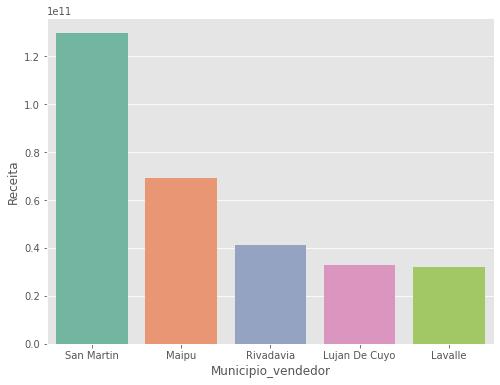

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=Top5_municipios, x='Municipio_vendedor', y='Receita', palette='Set2');

### **1.3. Qual foi o mes com a maior venda de produtos viníferos?**

In [ ]:
Volumes_por_mes = df4.groupby(
    ['Mes']
    ).agg({'Volume':np.sum}
    ).sort_values(by='Volume', ascending=False
    ).reset_index()
Volumes_por_mes = Volumes_por_mes.sort_values(by='Mes')

In [ ]:
volumes = (list(Volumes_por_mes.Volume))
media_vol = Volumes_por_mes.Volume.mean()

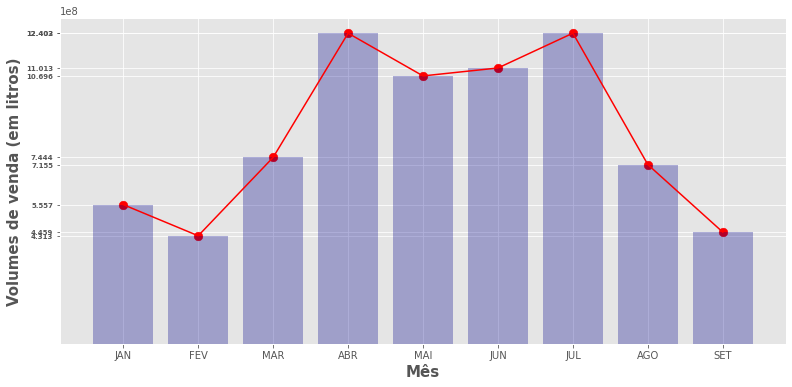

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
ax=plt.plot(Volumes_por_mes.Mes, Volumes_por_mes.Volume, c='red')
ax=plt.scatter(Volumes_por_mes.Mes, Volumes_por_mes.Volume, c='red', s=75)

plt.bar(Volumes_por_mes.Mes, Volumes_por_mes.Volume, color='darkblue', alpha=0.3)

plt.xlabel('Mês',fontweight=700, fontsize=15)
plt.ylabel('Volumes de venda (em litros)',fontweight=700,fontsize=15)
plt.xticks(Volumes_por_mes.Mes,labels=['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET'])
plt.yticks(Volumes_por_mes.Volume,fontweight=700, fontsize=7);
plt.style.use('ggplot');



## **2) Análises de produtos e de receitas**

### **2.1. Quais os 5 produtos que geraram maior receita?**

In [ ]:
# Visualizando lista dos 5 produtos que geraram maior receita
Top5_e_outros

,index,Produto,Receita
0,0,Vino Tinto,1.473620e+11
1,1,Vino Varietal Tinto,1.370768e+11
2,2,Vino Blanco,8.969078e+10
3,3,Mosto Sulfitado Blanco,6.323611e+10
4,4,Vino Varietal Blanco,2.943580e+10
5,0,Outros,4.483594e+10


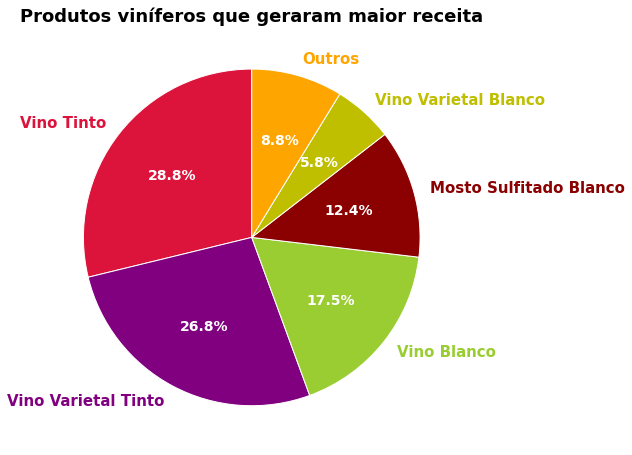

In [ ]:
# Criando gráfico circular para visualizar porcentagens de produtos destacados
# em relação à produção total

fig, ax = plt.subplots(figsize=(8.5,8.5))

labels = list(Top5_e_outros.Produto.values)
values = list(Top5_e_outros.Receita.values)

patches, texts, pcts = ax.pie(
    values,
    labels=labels,
    autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors = ['crimson','purple','yellowgreen', 'darkred','y','orange'],
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=700, fontsize=14)
plt.setp(texts, fontweight=700, fontsize=15)
ax.set_title('Produtos viníferos que geraram maior receita',
             fontsize=18,
             fontweight=700,
             color='black')
plt.tight_layout()

### **2.2. Considerando a relevância dos vinhos varietais, quais os 5 que geraram maior receita?**

In [ ]:
# Visualizando lista das 5 variedades de vinho que geraram maior receita
Top5_varietais

,Produto,Variedade,Receita
0,Vino Varietal Tinto,Malbec,7.249690e+10
1,Vino Varietal Tinto,Bonarda,2.030066e+10
2,Vino Varietal Tinto,Syrah,1.469312e+10
3,Vino Varietal Tinto,Cabernet Sauvignon,1.337351e+10
4,Vino Varietal Blanco,Riojano Torrontes,1.081940e+10


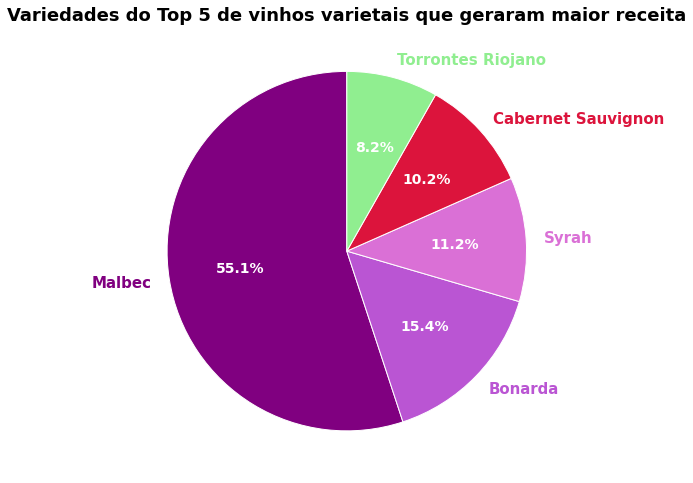

In [ ]:
# Criando gráfico circular para visualizar porcentagens de cada variedade
# em relação ao total das 5 variedades destacadas
fig, ax1 = plt.subplots(figsize=(9,9))

labels_varietais = list(Top5_varietais.Variedade.values)
labels_varietais[-1]='Torrontes Riojano'
values_varietais = list(Top5_varietais.Receita.values)

patches, texts, pcts = ax1.pie(
    values_varietais,
    labels=labels_varietais,
    autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors = ['purple','mediumorchid','orchid','crimson','lightgreen'],
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=700, fontsize=14)
plt.setp(texts, fontweight=700, fontsize=15)
ax1.set_title('Variedades do Top 5 de vinhos varietais que geraram maior receita',
             fontsize=18,
             fontweight=700,
             color='black')
plt.tight_layout()

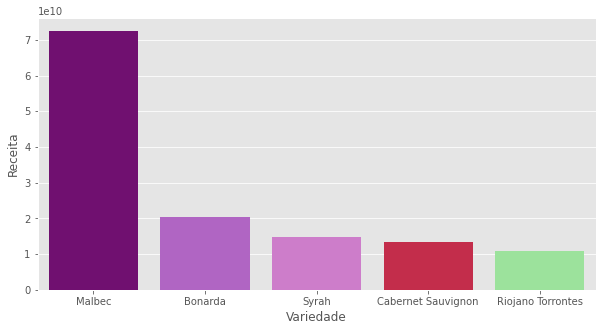

In [ ]:
# Criando gráfico de colunas para visualizar valores absolutos
colors = ['purple','mediumorchid','orchid','crimson','lightgreen']
fig, plt.subplots(figsize=(10,5))
sns.barplot(data=Top5_varietais, x='Variedade', y='Receita', palette=colors);

### **2.3. Cómo foram os preços desses 5 vinhos?**

In [ ]:
variedades_top5 = list(Top5_varietais.Variedade.values)

for vinho in variedades_top5:
  media = df4[df4.Variedade == vinho].Preco.mean()
  mediana = df4[df4.Variedade == vinho].Preco.median()
  desvio = df4[df4.Variedade == vinho].Preco.std()
  minimo = df4[df4.Variedade == vinho].Preco.min()
  maximo = df4[df4.Variedade == vinho].Preco.max()

  print(f"Vinho {vinho.upper()} \n" +  
        f"Preço médio: ${media: .2f} \n" +
        f"Preço máximo: ${maximo: .2f} \n" +
        f"Preço mínimo ${minimo: .2f} \n" + 
        f"Mediana ${mediana: .2f} \n"
        f"Desvío padrão:{desvio: .2f} \n")

Vinho MALBEC 
Preço médio: $ 116.24 
Preço máximo: $ 8803.00 
Preço mínimo $ 0.84 
Mediana $ 85.00 
Desvío padrão: 240.26 

Vinho BONARDA 
Preço médio: $ 70.41 
Preço máximo: $ 290.00 
Preço mínimo $ 15.00 
Mediana $ 66.09 
Desvío padrão: 34.14 

Vinho SYRAH 
Preço médio: $ 83.20 
Preço máximo: $ 1091.33 
Preço mínimo $ 10.00 
Mediana $ 75.00 
Desvío padrão: 88.12 

Vinho CABERNET SAUVIGNON 
Preço médio: $ 103.39 
Preço máximo: $ 1746.19 
Preço mínimo $ 5.00 
Mediana $ 85.00 
Desvío padrão: 126.44 

Vinho RIOJANO TORRONTES 
Preço médio: $ 91.55 
Preço máximo: $ 532.00 
Preço mínimo $ 15.00 
Mediana $ 80.00 
Desvío padrão: 65.57 



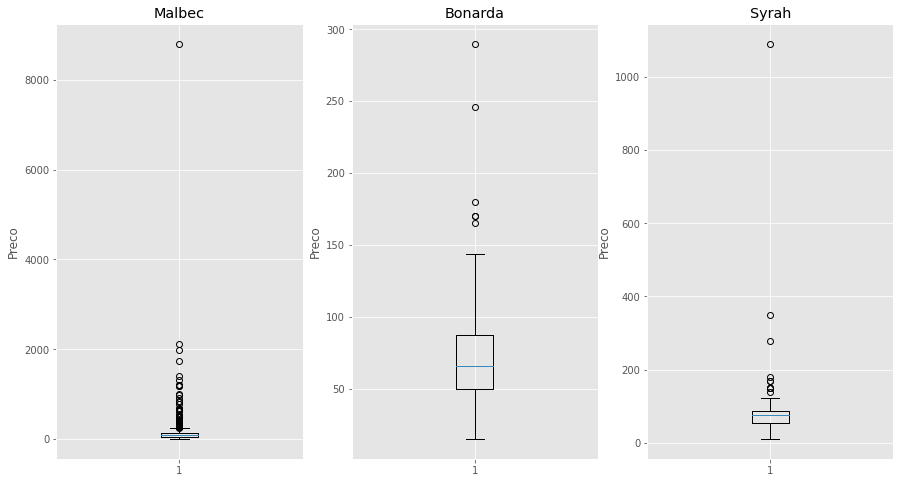

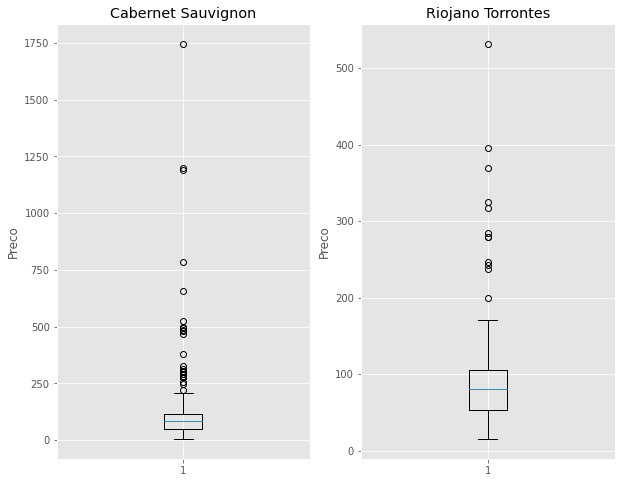

In [ ]:
# Gerando os boxplots dos preços das 5 variedades de vinhos
# que geraram maior receita.

fig, axes = plt.subplots(1,3, figsize=(15,8))
axes[0].boxplot(df4[df4.Variedade == variedades_top5[0]].Preco)
axes[0].set_title(variedades_top5[0])
axes[0].set(ylabel='Preco')

axes[1].boxplot(df4[df4.Variedade == variedades_top5[1]].Preco)
axes[1].set_title(variedades_top5[1])
axes[1].set(ylabel='Preco')

axes[2].boxplot(df4[df4.Variedade == variedades_top5[2]].Preco)
axes[2].set_title(variedades_top5[2])
axes[2].set(ylabel='Preco')

plt.show();
fig, axes1 = plt.subplots(1,2, figsize=(10,8))
axes1[0].boxplot(df4[df4.Variedade == variedades_top5[3]].Preco)
axes1[0].set_title(variedades_top5[3])
axes1[0].set(ylabel='Preco')

axes1[1].boxplot(df4[df4.Variedade == variedades_top5[4]].Preco)
axes1[1].set_title(variedades_top5[4])
axes1[1].set(ylabel='Preco');


### **2.4. Quais foram os 5 vinhos varietais tintos que geraram maior receita e quais os varietais brancos?**

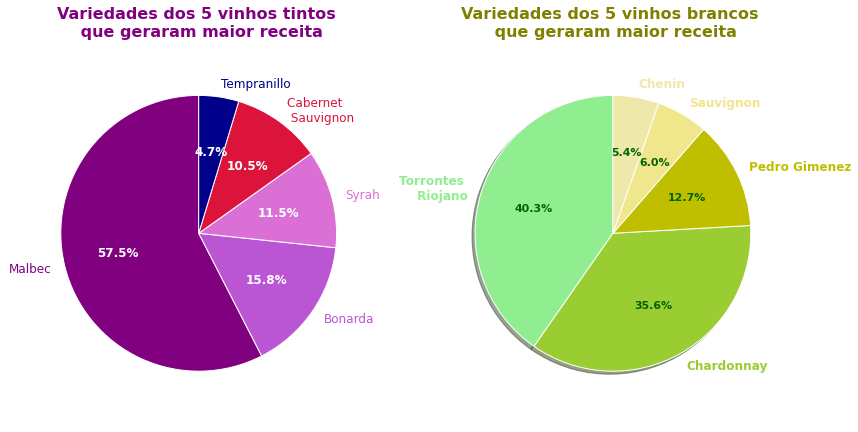

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,12))

labels_tinto = list(Top5_varietais_tintos.Variedade.values)
labels_tinto[3]='Cabernet \n Sauvignon'
values_tinto = list(Top5_varietais_tintos.Receita.values)

patches, texts, pcts = ax[0].pie(
    values_tinto,
    labels=labels_tinto,
    radius=0.9,
    autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors = ['purple','mediumorchid','orchid', 'crimson','darkblue'],
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=700, fontsize=12)
plt.setp(texts, fontweight=500, fontsize=12)
ax[0].set_title('Variedades dos 5 vinhos tintos \n que geraram maior receita',
             fontsize=16,
             fontweight=700,
             color='purple')
plt.tight_layout()

labels_branco = list(Top5_varietais_brancos.Variedade.values)
labels_branco[0]='Torrontes \n Riojano'
labels_branco[2]='Pedro Gimenez'
values_branco = list(Top5_varietais_brancos.Receita.values)

patches, texts, pcts = ax[1].pie(
    values_branco,
    labels=labels_branco,
    autopct='%.1f%%',
    radius=0.9,
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    shadow = True,
    colors = ['lightgreen','yellowgreen','y','khaki','palegoldenrod'],
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='darkgreen', fontweight=700, fontsize=11)
plt.setp(texts, fontweight=700, fontsize=12)
ax[1].set_title('Variedades dos 5 vinhos brancos \n que geraram maior receita',
             fontsize=16,
             fontweight=700,
             color='olive')
plt.tight_layout()

### **2.5. Quais os vinhos que fizeram maior volume, os de variedades puras, ou os que continham outras variedades para vinhificar?**

In [ ]:
VOLUME_TOTAL_PUROS = Vinhos_puros.Volume.sum()
VOLUME_TOTAL_IMPUROS = Vinhos_impuros.Volume.sum()

print(f'O volume de vinhos puros foi de: {VOLUME_TOTAL_PUROS} litros')
print(f'O volume de vinhos impuros foi de: {VOLUME_TOTAL_IMPUROS} litros')
print('')
if VOLUME_TOTAL_PUROS > VOLUME_TOTAL_IMPUROS:
  print('Foi maior o volume de vinhos PUROS')
elif VOLUME_TOTAL_PUROS < VOLUME_TOTAL_IMPUROS:
  print('Foi maior o volume de vinhos IMPUROS')
else:
  print('O volume de vinhos puros foi igual ao dos impuros')

O volume de vinhos puros foi de: 4637861630.0 litros
O volume de vinhos impuros foi de: 1318964220.0 litros

Foi maior o volume de vinhos PUROS


### **2.6. Como foram os preços dos vinhos de variedades puras em relação aos que continham outras variedades não especificadas?**

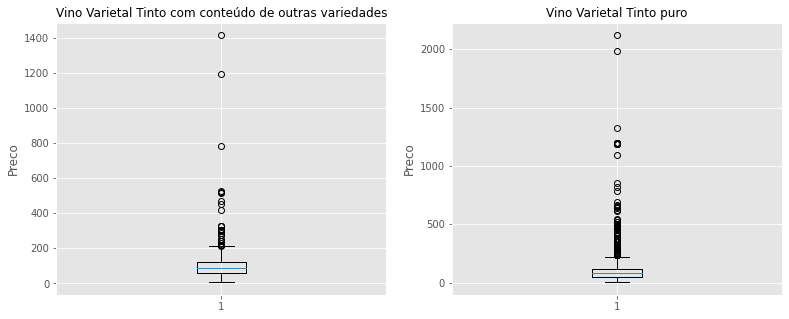

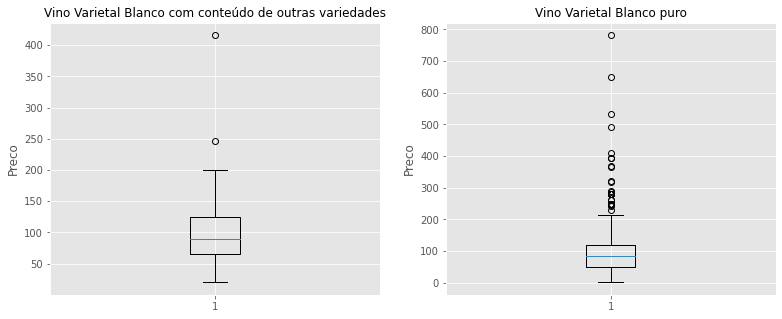

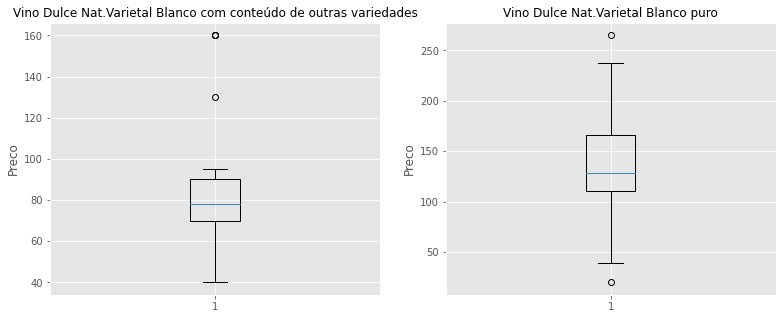

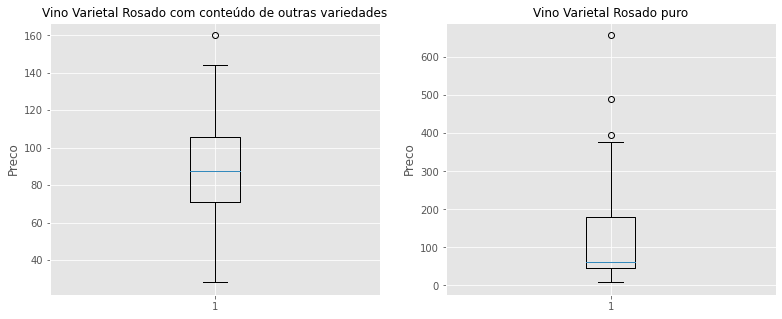

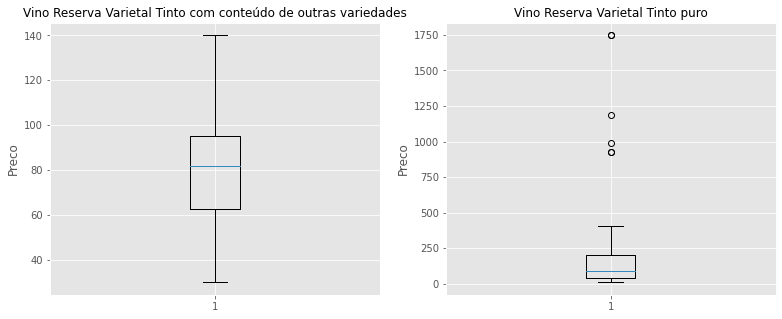

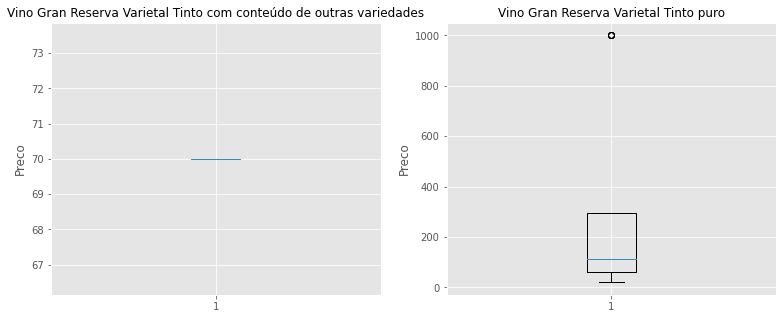

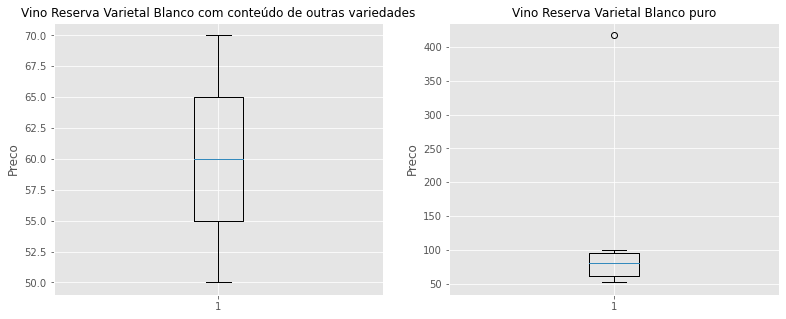

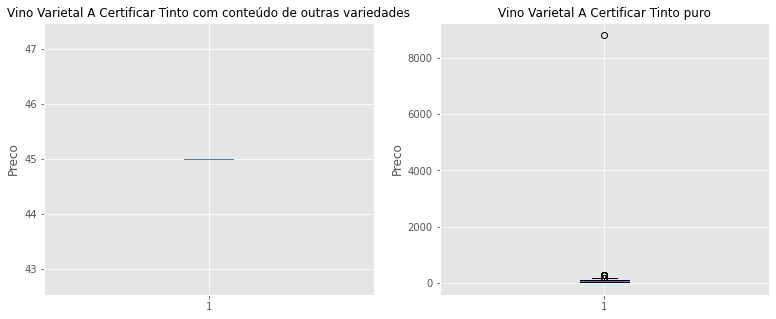

In [ ]:
impuros = list(Vinhos_impuros.Produto.unique())
puros = list(Vinhos_puros.Produto.unique())

# Comparando os boxplots dos preços dos mesmos produtos viníferos,
# com e sem presença de outras variedades misturadas.

for i in impuros:
  for p in puros:
    if i == p:
      fig, ax = plt.subplots(1,2, figsize=(13,5))
      ax[0].boxplot(Vinhos_impuros[Vinhos_impuros.Produto == i].Preco)
      ax[0].set_title(i+ ' com conteúdo de outras variedades', fontsize=12)
      ax[0].set(ylabel='Preco')

      ax[1].boxplot(Vinhos_puros[Vinhos_puros.Produto == p].Preco)
      ax[1].set_title(p + ' puro', fontsize=12)
      ax[1].set(ylabel='Preco')

### **2.7. Quais os produtos que geraram maior volume?**

In [ ]:
# Criando DataFrame dos produtos que geraram maior volume
Volumosos = df4.groupby('Produto').agg({'Volume':np.sum}).reset_index()

# Criando os DataFrames dos 5 vinhos que geraram maior volume e dos
# 5 produtos não vinhos que geraram maior volume
Top5_volumosos_vinhos = Volumosos[Volumosos.Produto.str.contains('Vino')==True].nlargest(5, 'Volume')
Top5_volumosos_naovinhos = Volumosos[~(Volumosos.Produto.str.contains('Vino')==True)].nlargest(5, 'Volume')

In [ ]:
Volumosos.nlargest(5, 'Volume')

,Produto,Volume
37,Vino Tinto,2.126119e+09
13,Vino Blanco,1.658981e+09
46,Vino Varietal Tinto,1.483688e+09
7,Mosto Sulfitado Blanco,1.434725e+09
41,Vino Varietal Blanco,3.391204e+08


In [ ]:
Top5_volumosos_vinhos

,Produto,Volume
37,Vino Tinto,2.126119e+09
13,Vino Blanco,1.658981e+09
46,Vino Varietal Tinto,1.483688e+09
41,Vino Varietal Blanco,3.391204e+08
36,Vino Rosado,2.359352e+08


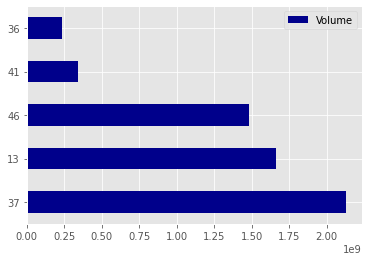

In [ ]:
Top5_volumosos_vinhos.plot.barh(color='darkblue');

In [ ]:
Top5_volumosos_naovinhos

,Produto,Volume
7,Mosto Sulfitado Blanco,1.434725e+09
3,Mosto Concentrado Blanco,8.529692e+07
11,Mosto Virgen Previamente Limpiado Y Mantenido ...,3.530307e+07
10,Mosto Virgen De Uva Blanco,1.722490e+07
5,Mosto Concentrado Rectificado Blanco,8.333890e+06


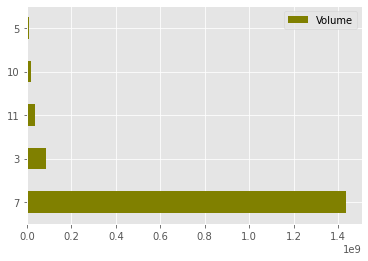

In [ ]:
Top5_volumosos_naovinhos.plot.barh(color='olive');

### **2.8. Quantas vendas foram feitas com pagamento ao contado e quantas diferido?**

contado     5787
diferido    4707
Name: Forma_pagamento, dtype: int64 

Contado:        55.00 %
Diferido:       44.83 %
Não esclarecido: 0.17 % 



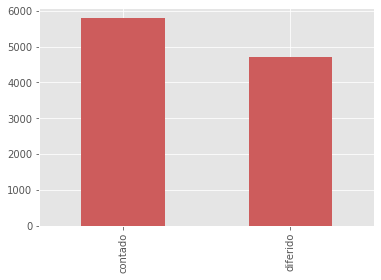

In [ ]:
print(df4.Forma_pagamento.value_counts(), '\n');
contado_percentual = round(df4.Forma_pagamento.value_counts()[0]/len(df4),2)*100
diferido_percentual = (df4.Forma_pagamento.value_counts()[1]/len(df4))*100
nao_esclarecido = 100 - contado_percentual - diferido_percentual
print(f'Contado: {contado_percentual:12.2f} %');
print(f'Diferido: {diferido_percentual:11.2f} %');
print(f'Não esclarecido: {nao_esclarecido:.2f} % \n');
df4.Forma_pagamento.value_counts().plot.bar(color='indianred');

### **2.9. Quál foi a receita paga no contado e qual em diferido?**

Receita em contado: $ 198105258612.5
Receita em diferido: $ 313532243666.6 

Receita em contado porcentual: 38.72 %
Receita em diferido porcentual: 61.28 %
Receita não esclarecida porcentual: 0.0 %


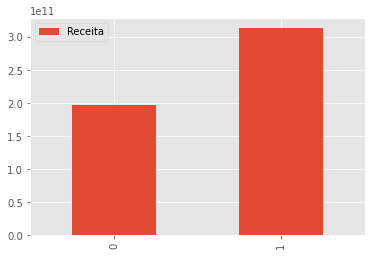

In [ ]:
RECEITA_TOTAL = df4.Receita.sum()

Receitas_pagamento = df4.groupby('Forma_pagamento').agg({'Receita':np.sum}).reset_index()
print('Receita em contado: $', f'{Receitas_pagamento.Receita.values[0]}')
print('Receita em diferido: $', f'{Receitas_pagamento.Receita.values[1]} \n')
Receita_contadop = 100*(Receitas_pagamento.Receita.values[0])/RECEITA_TOTAL
Receita_diferidop = 100*(Receitas_pagamento.Receita.values[1])/RECEITA_TOTAL

print('Receita em contado porcentual:',f'{Receita_contadop:.5} %')
print('Receita em diferido porcentual:',f'{Receita_diferidop:.5} %')

print('Receita não esclarecida porcentual:', f'{100 - Receita_contadop - Receita_diferidop:.8} %')
Receitas_pagamento.plot.bar();

### **2.10. Quais os 5 produtos pagados em contado que geraram mais receita e quais os 5 em diferido que geraram mais receita?**

In [ ]:
Produtos_contado = df4[df4.Forma_pagamento == 'contado'].groupby('Produto').agg({'Receita':np.sum}).reset_index()
Top5_produtos_contado= Produtos_contado.nlargest(5, 'Receita')
Produtos_diferido = df4[df4.Forma_pagamento == 'diferido'].groupby('Produto').agg({'Receita':np.sum}).reset_index()
Top5_produtos_diferido = Produtos_diferido.nlargest(5, 'Receita')

print('5 produtos que geraram mais receito com pagamento contado \n\n',
      Top5_produtos_contado, '\n \n \n')
print('5 produtos que geraram mais receito com pagamento diferido \n\n',
      Top5_produtos_diferido)

5 produtos que geraram mais receito com pagamento contado 

                    Produto       Receita
39     Vino Varietal Tinto  6.732001e+10
30              Vino Tinto  4.992690e+10
11             Vino Blanco  2.923663e+10
6   Mosto Sulfitado Blanco  2.018878e+10
34    Vino Varietal Blanco  1.901826e+10 
 
 

5 produtos que geraram mais receito com pagamento diferido 

                      Produto       Receita
22                Vino Tinto  9.743514e+10
28       Vino Varietal Tinto  6.975681e+10
9                Vino Blanco  6.045415e+10
5     Mosto Sulfitado Blanco  4.304733e+10
1   Mosto Concentrado Blanco  1.072716e+10


### **2.11. Quais os valores dos volumes de produtos viníferos segundo a presença de outras variedades?**

  Outras_variedades        Volume
0           brancas  6.219822e+08
1              rose  1.200832e+08
2      sem_misturas  6.225312e+09
3            tintas  5.212232e+08
4    tintas-brancas  5.221265e+07
5       tintas-rose  3.463000e+06 




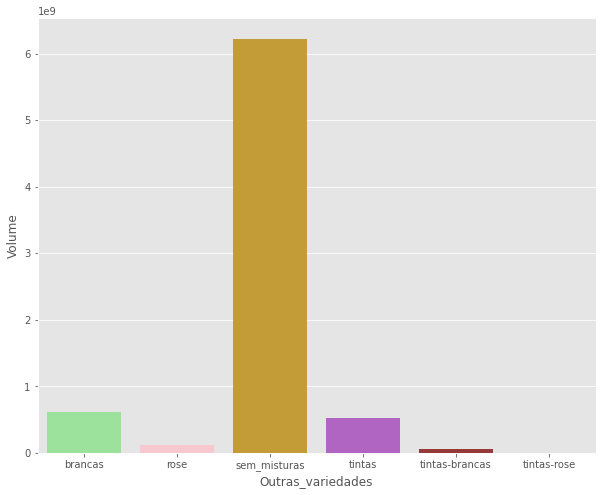

In [ ]:
# Criando DataFrame dos volumes dos produtos agrupados pela presença de outras variedades
Misturas_vinhos = df4.groupby('Outras_variedades').agg({'Volume':np.sum}).reset_index()
print(Misturas_vinhos, '\n\n')


colors = ['lightgreen','pink','goldenrod','mediumorchid','brown','orchid','crimson']
fig, plt.subplots(figsize=(10,8))
sns.barplot(data=Misturas_vinhos, x='Outras_variedades', y='Volume', palette=colors);

# **Conclusões**

> 1) O estado que gerou a maior receita foi Mendoza, destacándose em eles os municípios de San Martín em primeiro lugar e de Maipu em segundo. O mês de produção e lucro mais frutuoso tem sido **julho** (ficando ***abril*** em segundo lugar). <br> <br>
2) Os dois produtos mais estratégicos para a geração de lucro foram o vinho tinto (sem especificação de variedade) e o vinho tinto varietal. <br>
Além do vinho branco, que segue em terceiro lugar, se destaca a relevância do mosto sulfitado branco. Este pode ser um produto estratégico a ser estudo, pois, embora seja vendido a um preço menor, *surge como um produto adicional do aproveitamento da uva para o vinho.* <br><br>
3) A variedade tinta **Malbec** foi a mais vendida e a que gerou maior receita. Isto o aloca como um produto estratégico para investir. Tenha-se em conta que, entre as variedades que geraram maior receita, foi o que teve o maior preço máximo e o maior preço médio.<br>
De entre as variedades brancas se destaca o **Torrontés Riojano**. <br><br>
4) Podemos ver que a maioria dos tipos de vinho com presença de outras variedades não especificadas (impuros), como o Varietal rosado, Natural branco doce, Reserva varietal tinto ou Reserva varietal branco, alcançaram preços maiores e com maior dispersão. Este ponto, por sinal contra intuitivo, requer uma análise mais profunda para saber o porquê. Por exemplo, pode estar vinculado à obtenção de produtos com caraterísticas específicas desejadas pelo público consumidor utilizando misturas, o que poderia aumentar a demanda e com isso o preço. <br><br>
5) O 61.28 % da receita é composto por pagamento diferido (crédito). Os dois que geraram mais lucro dentro dessa categoria de pagamento corresponde a vinhos tintos. No caso de pagamento contado (à vista), o mesmo tipo de produto ocupa o primeiro lugar. Estes dados falam da relevância dos vinhos tintos no mercado argentino, e de como os investidores tem um nível de confiança maior em relação a outros produtos.